In [1]:
import os
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Укажите путь к папке с файлами
data_folder = r"C:\Users\Гребенников Матвей\Desktop\Диплом\Курсовая\MachineLearningCSV\MachineLearningCVE"

# Список файлов
file_list = [os.path.join(data_folder, file) for file in os.listdir(data_folder) if file.endswith('.csv')]

# Объединяем файлы в один DataFrame
data = pd.concat([pd.read_csv(file) for file in file_list], ignore_index=True)


In [2]:
# Предполагается, что последний столбец - это метки классов, а остальные - признаки
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Обработка NaN, Inf и слишком больших значений
X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Заменяем Inf на NaN
X.fillna(X.mean(), inplace=True)  # Заменяем NaN средним значением по колонке
X = X.astype(np.float32)  # Приводим данные к типу float32, чтобы избежать ошибок переполнения

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
#Создание дерева
decision_tree = DecisionTreeClassifier(random_state=42)
start_time = time.time()  # Начало отсчета времени
decision_tree.fit(X_train, y_train)
elapsed_time = time.time() - start_time  # Конец отсчета времени

# Оценка модели
predictions = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Decision Tree Accuracy: {accuracy:.4f}")
print(f"Time Taken: {elapsed_time:.4f} seconds")


Decision Tree Accuracy: 0.9984
Time Taken: 154.8101 seconds


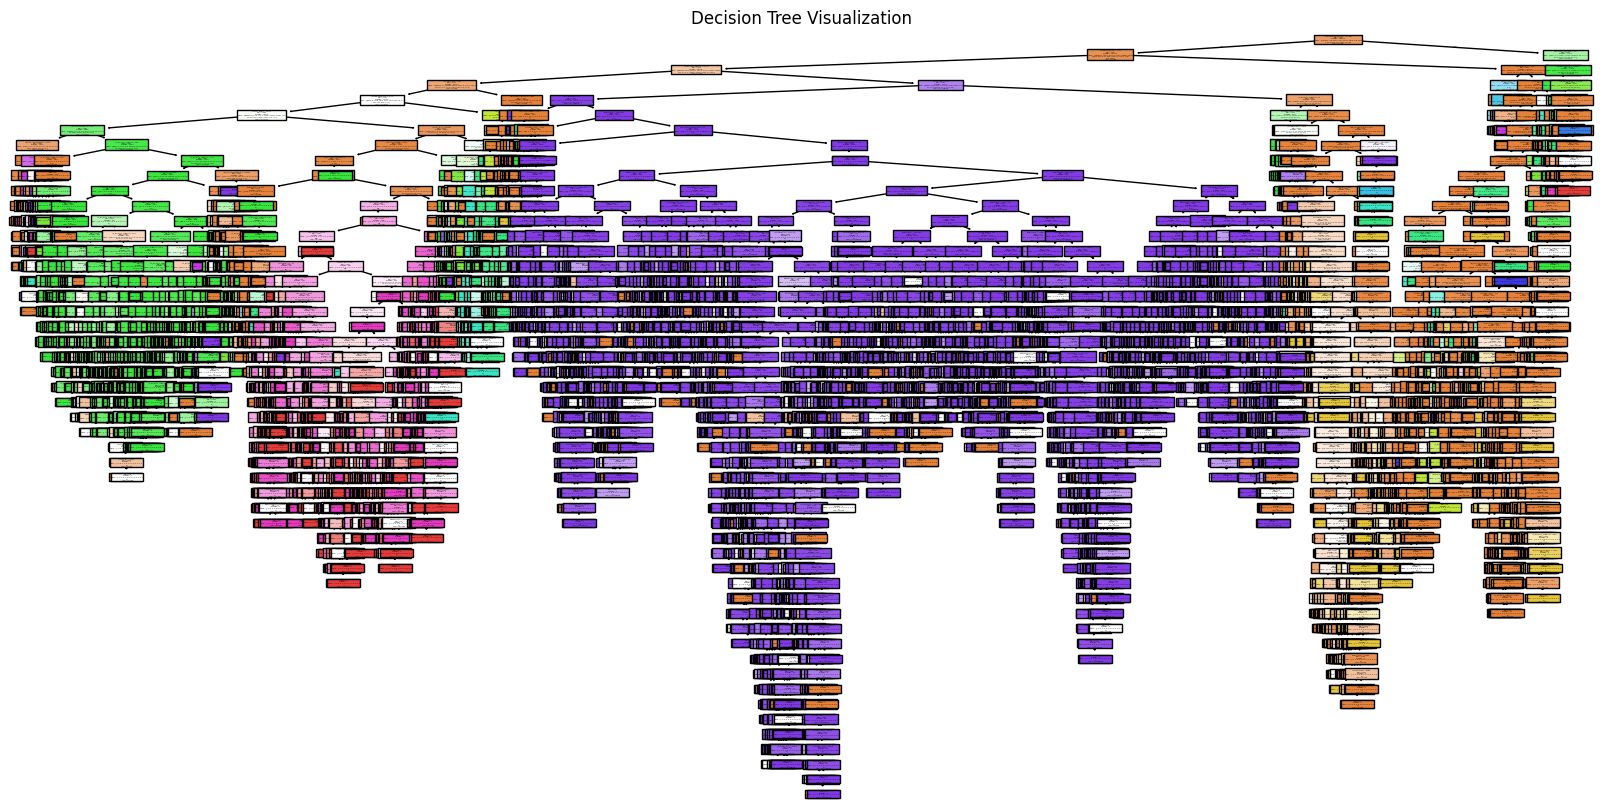

In [4]:
# График дерева решений
plt.figure(figsize=(20, 10))

# Передаем список строк с уникальными именами классов
plot_tree(decision_tree, 
          feature_names=X.columns, 
          class_names=[str(label) for label in y.unique()],  # Преобразуем классы в список строк
          filled=True)

plt.title("Decision Tree Visualization")
plt.show()



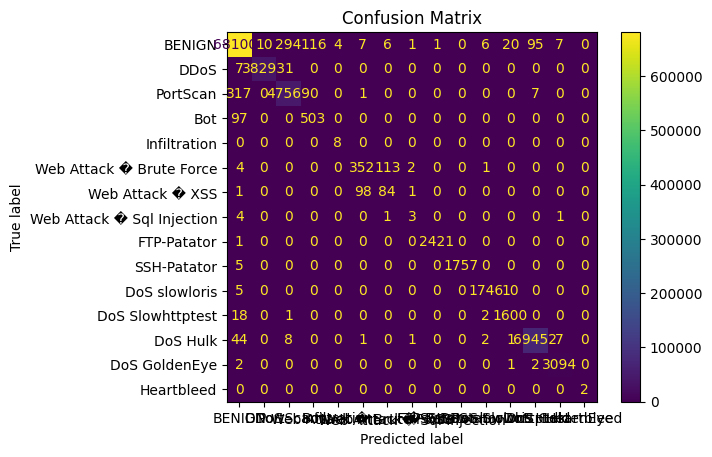

In [5]:
#График матрицы ошибок
conf_matrix = confusion_matrix(y_test, predictions, labels=y.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=y.unique())
disp.plot(cmap="viridis")
plt.title("Confusion Matrix")
plt.show()
